Healthy Minds Dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
df201718 = pd.read_csv('2017-2018.csv', encoding='ISO-8859-1')
df201819 = pd.read_csv('2018-2019.csv', encoding='ISO-8859-1')
df201920 = pd.read_csv('2019-2020.csv', encoding='ISO-8859-1')

# Merging the datasets
df = pd.concat([df201718, df201819, df201920], ignore_index=True)


/var/folders/9t/k0wdgts94xxd3z4rwr3szc1m0000gn/T/ipykernel_66484/3802539651.py:2: DtypeWarning: Columns (25,55,59,87,207,231,250,255,269,277,290,294,323,393,422,423,424,443,453,509,513,540,615,667,669,794,811,838,861,863,864,865,866,867,885,919,927,944,948,969,996,1051,1082,1083,1117,1131,1144,1181,1194,1203,1860) have mixed types. Specify dtype option on import or set low_memory=False.
  df201718 = pd.read_csv('2017-2018.csv', encoding='ISO-8859-1')
/var/folders/9t/k0wdgts94xxd3z4rwr3szc1m0000gn/T/ipykernel_66484/3802539651.py:3: DtypeWarning: Columns (118,188,190,191,194,200,201,239,251,253,258,264,270,275,276,277,278,279,280,281,283,284,286,287,288,290,291,292,293,294,484,491,507,514,536,537,538,541,542,544,549,550,609,618,663,667,697,721,723,724,725,730,739,746,816,818,824,835,858,873,880,892,893,1055,1057,1058,1059,1065,1181,1222,1225,1228,1232,1238,1242,1243,1244,1246,1247,1248,1253,1256,1257,1259,1260,1262,1265,1266,1267,1294,1295,1297,1298,1300,1301,1303,1304,1311,1312,1314,131

In [5]:
# read the labels
shared_labels = df201718.columns.intersection(df201819.columns).intersection(df201920.columns)
print(list(shared_labels))

['survey', 'nrweight', 'responseid', 'age', 'sex_birth', 'gender', 'sexual_h', 'sexual_l', 'sexual_g', 'sexual_bi', 'sexual_queer', 'sexual_quest', 'sexual_other', 'relship', 'race_black', 'race_ainaan', 'race_asian', 'race_his_temp', 'race_pi', 'race_mides', 'race_white', 'race_other', 'international', 'fincur', 'finpast', 'children_dep', 'hours_work_paid', 'educ_par1', 'educ_par2', 'educ_par1_rel', 'educ_par2_rel', 'religios', 'relig_aff_ag', 'relig_aff_at', 'relig_aff_b', 'relig_aff_ca', 'relig_aff_ch', 'relig_aff_h', 'relig_aff_j', 'relig_aff_m', 'relig_aff_no', 'relig_aff_oth', 'degree_ass', 'degree_bach', 'degree_ma', 'degree_jd', 'degree_md', 'degree_phd', 'degree_other', 'degree_nd', 'transfer', 'yr_sch', 'enroll', 'field_hum', 'field_nat', 'field_soc', 'field_arc', 'field_art', 'field_bus', 'field_den', 'field_ed', 'field_eng', 'field_law', 'field_med', 'field_mus', 'field_nur', 'field_pharm', 'field_prep', 'field_ph', 'field_pp', 'field_sw', 'field_und', 'field_other', 'gpa_s

In [6]:
# do we have similar ids in all datasets?
ids_201718 = df201718['responseid']
ids_201819 = df201819['responseid']
ids_201920 = df201920['responseid']

common_ids = set(ids_201718) & set(ids_201819) & set(ids_201920)
print("Common ids: ", len(common_ids))

Common ids:  0


In [21]:
# Labels of Interest
anxietydepression = [col for col in df.columns if col.startswith('gad')]
sleep = [col for col in df.columns if col.startswith('sleep')]
eatingdisorder = [col for col in df.columns if col.startswith('scoff')]
print("Anxiety and depression: ", anxietydepression)
print("Sleep: ", sleep)
print("Eating disorder: ", eatingdisorder)

# Rows of Interest
race = ['race_black', 'race_ainaan', 'race_asian', 'race_his_temp', 'race_pi', 'race_mides', 'race_white', 'race_other'] #[col for col in df.columns if col.startswith('race')]
print(race)


Anxiety and depression:  ['gad7_1', 'gad7_2', 'gad7_3', 'gad7_4', 'gad7_5', 'gad7_6', 'gad7_7', 'gad7_impa']
Sleep:  ['sleep_wk1', 'sleep_wd1', 'sleep_wk2', 'sleep_wd2', 'sleep_np1', 'sleep_np2', 'sleep_class']
Eating disorder:  ['scoff_1', 'scoff_2', 'scoff_3', 'scoff_4', 'scoff_5']
['race_black', 'race_ainaan', 'race_asian', 'race_his_temp', 'race_pi', 'race_mides', 'race_white', 'race_other']


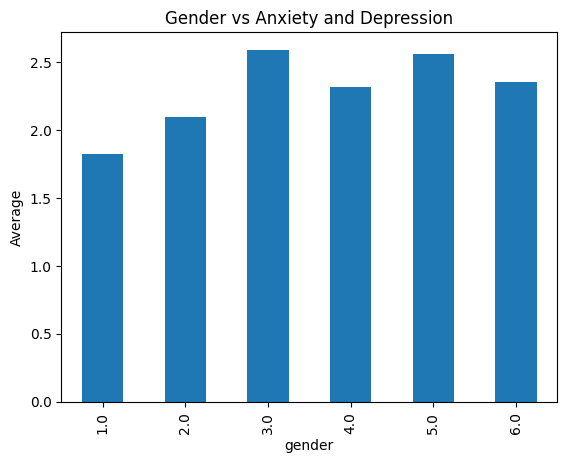

In [18]:
# gender vs anxiety and depression
gender_averages = df.groupby('gender')[anxietydepression].mean().mean(axis=1)
gender_averages.plot(kind='bar')
plt.title('Gender vs Anxiety and Depression')
plt.ylabel('Average')
plt.show()

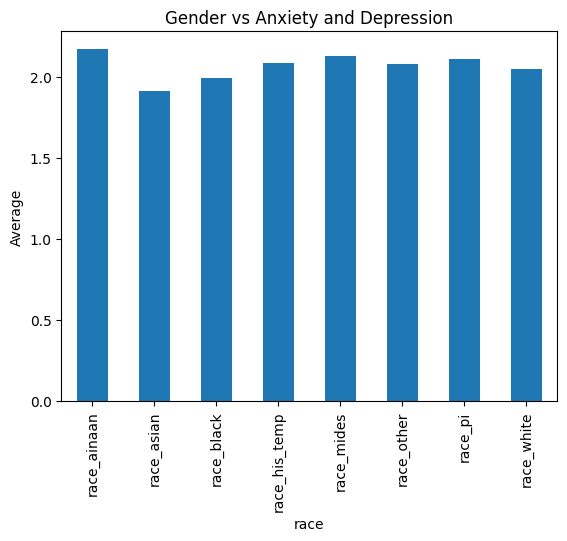

In [23]:
# race vs anxiety and depression
data_melted = pd.melt(df, id_vars=anxietydepression, value_vars=race, var_name='race', value_name='value')
data_melted = data_melted[data_melted['value'] == 1]
race_averages = data_melted.groupby('race')[anxietydepression].mean().mean(axis=1)
race_averages.plot(kind='bar')
plt.title('Race vs Anxiety and Depression')
plt.ylabel('Average')
plt.show()